# Loading and Exploring the Dataset  
In this step, we will load the dataset and explore its structure to understand the features available for analysis.

In [21]:
import chardet

# Read a small portion of the file to detect encoding
with open("IMDb Movies India.csv", "rb") as f:
    rawdata = f.read(100000)  # Read first 10,000 bytes
    result = chardet.detect(rawdata)
    encoding = result['encoding']

print(f"Detected file encoding: {encoding}")


Detected file encoding: ISO-8859-1


In [22]:
import pandas as pd

# Load the dataset using the detected encoding
file_path = "IMDb Movies India.csv"  
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first 5 rows of the dataset
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Exploratory Data Analysis (EDA)
### Understanding the dataset structure



In [23]:
# Check the number of rows and columns
print("Dataset Shape:", df.shape)

# Display column names and their data types
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary Statistics:")
df.describe()



Dataset Shape: (15509, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Summary Statistics:


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## Data Cleaning and Preprocessing
### Fixing Data Types and Handling Missing Values

In [24]:
import pandas as pd

# Create a copy of the original DataFrame to avoid modifying the original data
df_cleaned = df.copy()

# Convert 'Year' column to numeric by removing non-numeric characters
if "Year" in df_cleaned.columns:
    df_cleaned["Year"] = df_cleaned["Year"].str.extract("(\d+)")  # Extract numbers only
    df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"])  # Convert to integer

# List of numerical columns
numerical_columns = ["Year", "Duration", "Rating", "Votes"]

# Ensure all numerical columns exist and are numeric
for col in numerical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")  # Convert invalid values to NaN
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())  # Fill missing values with median

# List of categorical columns
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
        df_cleaned[col] = df_cleaned[col].str.lower()  # Convert text to lowercase for consistency

# Display the first few rows after cleaning
df_cleaned.head()






<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lenono\AppData\Local\Temp\ipykernel_11052\1691441755.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_cleaned["Year"] = df_cleaned["Year"].str.extract("(\d+)")  # Extract numbers only
c:\Users\lenono\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,NaN,drama,6.0,35.0,j.s. randhawa,manmauji,birbal,rajendra bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,NaN,drama,7.0,8.0,gaurav bakshi,rasika dugal,vivek ghamande,arvind jangid
2,#Homecoming,2021.0,NaN,"drama, musical",6.0,35.0,soumyajit majumdar,sayani gupta,plabita borthakur,roy angana
3,#Yaaram,2019.0,NaN,"comedy, romance",4.4,35.0,ovais khan,prateik,ishita raj,siddhant kapoor
4,...And Once Again,2010.0,NaN,drama,6.0,35.0,amol palekar,rajat kapoor,rituparna sengupta,antara mali


## Exploratory Data Analysis (EDA)
### Understanding Data Distribution and Trends  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  0 non-null      float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB

Summary Statistics:
               Year  Duration        Rating         Votes
count  15509.000000       0.0  15509.000000  15509.000000
mean    1987.147979       NaN      5.919131     71.241989
std       24.990727       NaN      0.990512    133.120371
min     1913.000000       NaN      1.100000      5.000000
25%     1969.000000       NaN      6.000000   

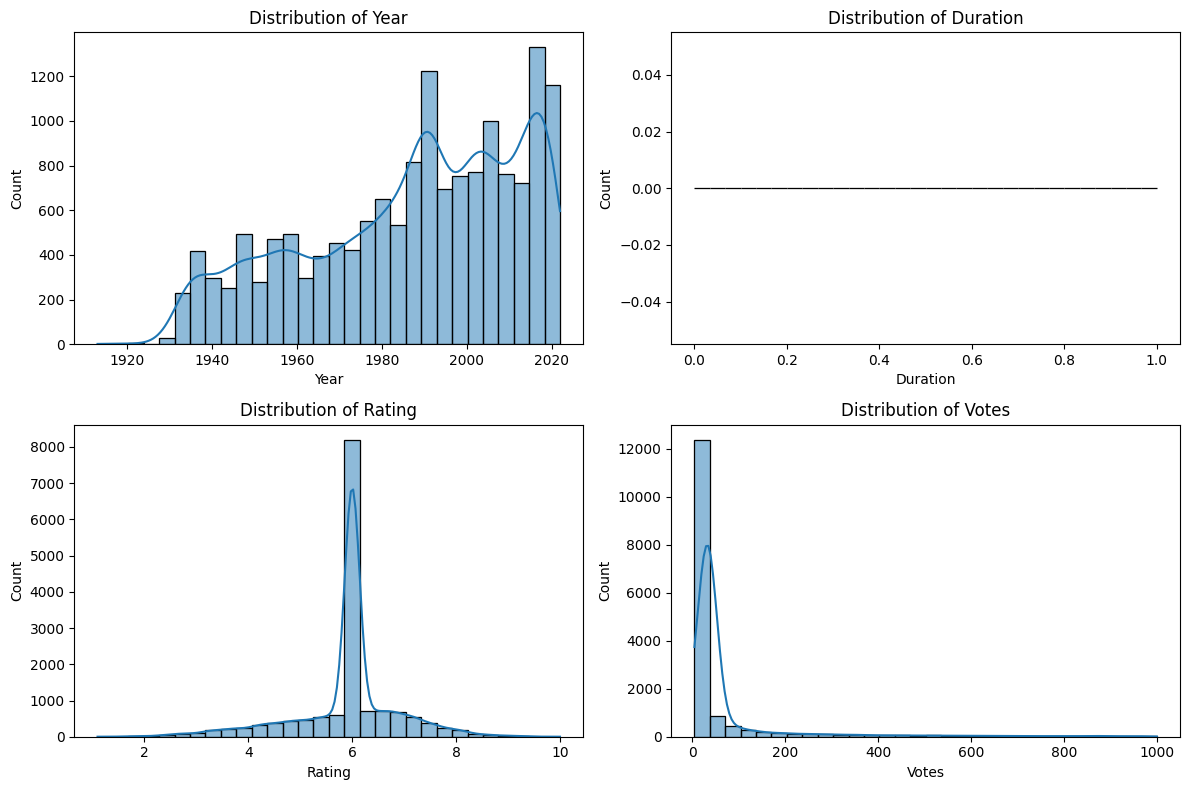

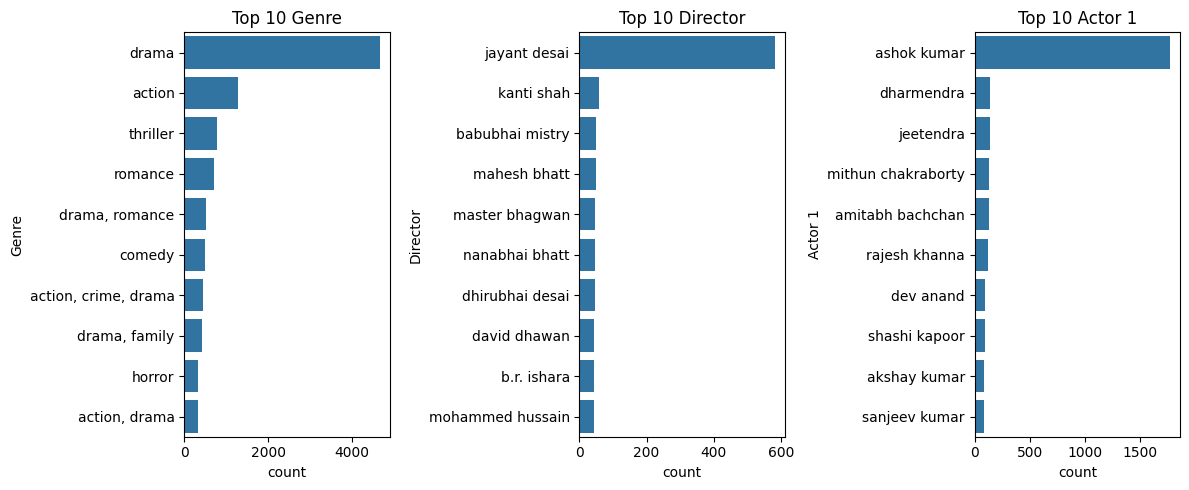

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic info about the dataset
print("Dataset Info:")
df_cleaned.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Count missing values in each column
print("\nMissing Values per Column:")
print(df_cleaned.isnull().sum())

# Visualizing the distribution of numerical columns
numerical_columns = ["Year", "Duration", "Rating", "Votes"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Countplot for categorical variables
categorical_columns = ["Genre", "Director", "Actor 1"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index[:10])
    plt.title(f"Top 10 {col}")

plt.tight_layout()
plt.show()





## Data Cleaning and Feature Engineering
### Removing Unnecessary Columns and Encoding Categorical Variables



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remove the 'Duration' column as it has no useful data
df_cleaned.drop(columns=["Duration"], inplace=True)
# Remove the 'Name' column as it has no useful data
df_cleaned.drop(columns=["Name"], inplace=True)

# Encoding categorical features
label_encoders = {}  # Dictionary to store encoders for each categorical column
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store the encoder for later use

# Display the first few rows after encoding
df_cleaned.head()




,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1991.0,299,6.0,35.0,1926,2250,800,3108
1,2019.0,299,7.0,8.0,1548,3280,4789,527
2,2021.0,351,6.0,35.0,5123,3713,2866,3450
3,2019.0,228,4.4,35.0,3319,2917,1504,4020
4,2010.0,299,6.0,35.0,385,3112,3461,405


## Splitting Data into Training and Testing Sets
  


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned.drop(columns=["Rating"])  # Features (input variables)
y = df_cleaned["Rating"]  # Target variable (what we want to predict)

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing sets
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")



Training Set: (12407, 7), Testing Set: (3102, 7)


##  Encoding Categorical Features  
### Converting Categorical Data into Numerical Format  

To train the model effectively, categorical features such as **Genre, Director, Actor 1, Actor 2, Actor 3** need to be converted into numerical values. We will apply **One-Hot Encoding** to transform these features while handling unknown categories gracefully.


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Ensure all categorical columns exist before encoding
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
existing_categorical_columns = [col for col in categorical_columns if col in X_train.columns]

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Apply encoding only if categorical columns exist
if existing_categorical_columns:
    X_train_encoded = encoder.fit_transform(X_train[existing_categorical_columns])
    X_test_encoded = encoder.transform(X_test[existing_categorical_columns])

    # Convert encoded features to DataFrame
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(existing_categorical_columns))
    X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(existing_categorical_columns))

    # Drop original categorical columns
    X_train = X_train.drop(columns=existing_categorical_columns).reset_index(drop=True)
    X_test = X_test.drop(columns=existing_categorical_columns).reset_index(drop=True)

    # Concatenate encoded features with numerical data
    X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
    X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Ensure all remaining columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Verify that the dataset is fully numeric
print("Final Training Set:\n", X_train.dtypes.value_counts())
print("Final Test Set:\n", X_test.dtypes.value_counts())


Final Training Set:
 float64    18097
Name: count, dtype: int64
Final Test Set:
 float64    18097
Name: count, dtype: int64


##  Model Training and Evaluation

###  Training the Regression Model
In this section, we train a Ridge Regression model using Principal Component Analysis (PCA) to reduce feature dimensionality. The steps include:

- **Feature Scaling**: Standardizing the data using `StandardScaler`.
- **Dimensionality Reduction**: Applying PCA to retain 200 components.
- **Model Training**: Using Ridge Regression with `alpha=1.0`.
- **Performance Evaluation**: Calculating MAE, MSE, and RMSE.

---


In [29]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce features to 200
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.5951
Mean Squared Error (MSE): 0.9295
Root Mean Squared Error (RMSE): 0.9641


##  Saving the Trained Model  

After training the model, we need to save it for future use without retraining.  
We will save:  
- The trained **Ridge Regression model**  
- The **StandardScaler** used for feature scaling  
- The **PCA** transformer for dimensionality reduction  

Using `joblib`, we can easily save and load these objects.


In [30]:
import joblib

# Save the trained model
joblib.dump(model, "ridge_regression_model.pkl")

# Save the scaler and PCA transformer
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")

print("Model and preprocessing objects saved successfully!")


Model and preprocessing objects saved successfully!


##  Model Deployment  
After training and saving the model, we now deploy it by loading the saved objects and preparing a function to make predictions on new data.


In [31]:
import joblib
import numpy as np

# Load the saved model, scaler, and PCA with the correct filename
loaded_model = joblib.load("ridge_regression_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_pca = joblib.load("pca.pkl")

print("Model and preprocessing objects loaded successfully!")



Model and preprocessing objects loaded successfully!


###  Testing the Deployed Model  

Now that the model and preprocessing objects are successfully loaded, we will test the model on new data to evaluate its performance.


In [32]:
import joblib
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the saved model, scaler, and PCA
loaded_model = joblib.load("ridge_regression_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_pca = joblib.load("pca.pkl")

# Transform the test data using the loaded scaler and PCA
X_test_scaled = loaded_scaler.transform(X_test)
X_test_pca = loaded_pca.transform(X_test_scaled)

# Make predictions
y_pred = loaded_model.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Testing Results:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Testing Results:
Mean Absolute Error (MAE): 0.5951
Mean Squared Error (MSE): 0.9295
Root Mean Squared Error (RMSE): 0.9641
